# Regression Metrics

When the target is of continuous type a natural way to evaluate the model performance is the *root mean square error (RMSE)*. The difference between predicted and observed values $\hat{y}_i - y_i$ are called redsiduals.


$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i)^2}$

In [1]:
import numpy as np

def get_simple_regression_samples(n,b0=-0.3,b1=0.5,error=0.2,seed=None):
    if seed:
        np.random.seed(seed)

    trueX =  np.random.uniform(-1,1,n)
    trueT = b0 + (b1*trueX)
    return np.array([trueX]).T, trueT + np.random.normal(0,error,n)

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

seed = 42
n = 20
b0_true = -0.3
b1_true = 0.5
X,y_true = get_simple_regression_samples(n,b0=b0_true,b1=b1_true,seed=seed)

reg = LinearRegression().fit(X, y_true)
reg.score(X, y_true)

## predict
y_pred = reg.predict(X)

print(round(np.linalg.norm(y_pred - y_true) / np.sqrt(n), 3))
print(round(np.sqrt(mean_squared_error(y_pred,y_true)), 3))
print(round(np.std(y_pred-y_true), 3))

0.176
0.176
0.176


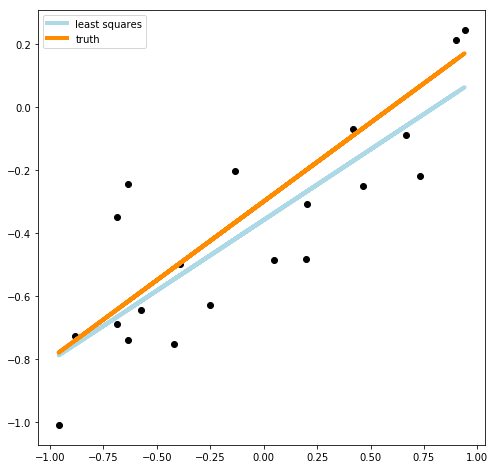

In [3]:
## plot the model
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(X[:,0],y_true,'ko')
ax.plot(X[:,0],y_pred,color='lightblue',linewidth=4,label='least squares')
ax.plot(X[:,0], b0_true + X[:,0]*b1_true, linewidth=4,color='darkorange',label='truth')
ax.legend()
plt.show()

This example illustrates the use of RMSE calculated several ways. We see that the metric is equivalent to the *sample standard deviation* of the differences.

The Mean Absolute Error is another commonly used metric in regression problems. A major advantage of RMSE and MAE is that the values are interpreted in the same units as the original data

$MAE = \frac{1}{N} \sum_{i=1}^N \left|\hat{y}_i - y_i\right|$

MAE is tha average of the absolute difference between the predicted values and observed values. Unlike RMSE all the indivudial scores are weighted equally during the averaging.

Many models will use RMSE to define a *loss function* because it is smoothly differentiable, but for model comparison purposes the choice should be made based on the following statement:

**IMPORTANT: The squaring of the term in RMSE results in a higher penalty on larger differences when compared to MAE**

The *coefficient of determination* also known as $R^2$ along with it more useful version, the adjusted $R^2$, represent the proportion of the variance for a target variable that is explained by the feature in regression model.

**WARNING: The unadjusted $R^2$ increases with the addition of features, even ones that do not improve the model so it should be avoided.**

$R^2$ is appropriate when we wish to quantify how well your features explain the target, given your data. If the primary focus of your model is prediction, then RMSE or MAE are going to be the best metrics to rely on in most cases.